In [3]:
# Head to the main JIND directory
%cd ../
# Make sure JIND is installed
# !pip3 install -e .
# !which pip

/srv/data/mohit/seq-rna/JIND


In [4]:
import numpy as np
import sys, os, pdb
import pandas as pd
import argparse
os.environ["CUDA_VISIBLE_DEVICES"]=""
import torch
from jind import JindLib
from matplotlib import pyplot as plt
import argparse
from datetime import datetime

In [5]:
# Path to source batch
train_path = "data/train.pkl"
# Path to target batch
test_path = "data/test.pkl"
# Column containing cell-types
lname = "labels" 

train_batch = pd.read_pickle(train_path)
test_batch = pd.read_pickle(test_path)

In [6]:
common_genes = list(set(train_batch.columns).intersection(set(test_batch.columns)))
common_genes.sort()
train_batch = train_batch[list(common_genes)]
test_batch = test_batch[list(common_genes)]

train_mat = train_batch.drop(lname, axis=1)
train_labels = train_batch[lname]

test_mat = test_batch.drop(lname, axis=1)
test_labels = test_batch[lname]

path = os.path.dirname(train_path) + "/JIND"

obj = JindLib(train_mat, train_labels, path=path)
mat = train_mat.values
mat_round = np.rint(mat)
error = np.mean(np.abs(mat - mat_round))
if error == 0:
    obj.preprocess(count_normalize=True, logt=True)

# Training NN-based Prediction Model

Variance based reduction ...


Epoch 1 Train: 0.0416:  20%|█▉        | 10/51 [00:00<00:00, 90.68it/s]

Validation Accuracy 0.9753


Epoch 2 Train: 0.0157:  20%|█▉        | 10/51 [00:00<00:00, 91.51it/s]

Validation Accuracy 0.9778


Epoch 3 Train: 0.0053:  20%|█▉        | 10/51 [00:00<00:00, 90.58it/s]

Validation Accuracy 0.9809


Epoch 4 Train: 0.0033:  20%|█▉        | 10/51 [00:00<00:00, 96.09it/s]

Validation Accuracy 0.9809


Epoch 5 Train: 0.0029:  20%|█▉        | 10/51 [00:00<00:00, 96.21it/s]

Validation Accuracy 0.9796


Epoch 6 Train: 0.0017:  20%|█▉        | 10/51 [00:00<00:00, 96.07it/s]

Validation Accuracy 0.9815


Epoch 7 Train: 0.0009:  20%|█▉        | 10/51 [00:00<00:00, 92.70it/s]

Validation Accuracy 0.9815


Epoch 8 Train: 0.0008:  20%|█▉        | 10/51 [00:00<00:00, 91.84it/s]

Validation Accuracy 0.9809


Epoch 9 Train: 0.0006:  22%|██▏       | 11/51 [00:00<00:00, 101.69it/s]

Validation Accuracy 0.9809


Epoch 10 Train: 0.0006:  20%|█▉        | 10/51 [00:00<00:00, 99.11it/s]

Validation Accuracy 0.9790


Epoch 11 Train: 0.0005:  20%|█▉        | 10/51 [00:00<00:00, 97.54it/s]

Validation Accuracy 0.9759


Epoch 12 Train: 0.0003:  20%|█▉        | 10/51 [00:00<00:00, 99.41it/s]

Validation Accuracy 0.9772


Epoch 13 Train: 0.0002:  18%|█▊        | 9/51 [00:00<00:00, 88.54it/s]

Validation Accuracy 0.9778


Epoch 14 Train: 0.0002:  20%|█▉        | 10/51 [00:00<00:00, 97.44it/s]

Validation Accuracy 0.9784


Epoch 14 Train: 0.0002: 100%|██████████| 51/51 [00:00<00:00, 92.84it/s]


Validation Accuracy 0.9784


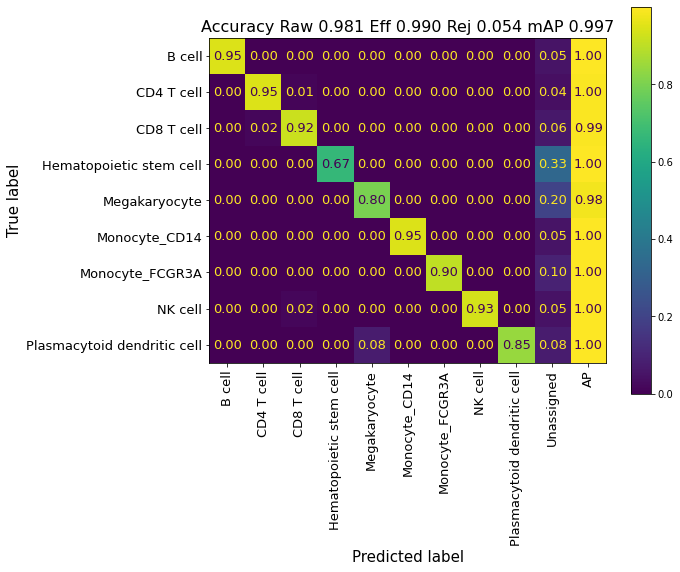

In [7]:
obj.dim_reduction(5000, 'Var')

train_config = {'val_frac': 0.2, 'seed': 0, 'batch_size': 128, 'cuda': False,
                'epochs': 15}

obj.train_classifier(config=train_config, cmat=True) # Creates confusion matrix on the validation data

# Evaluating NN-based Prediction Model

Test Acc Raw 0.9610 Eff 0.9892 Rej 0.2196


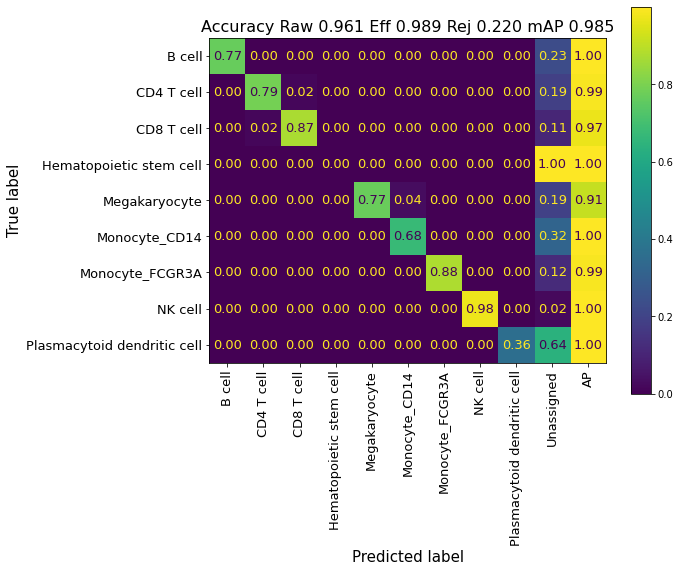

In [8]:
predicted_label1, log1 = obj.evaluate(test_mat, test_labels, frac=0.05, name="testcfmt.pdf", return_log=True)

In [9]:
# Save object for later use
obj.to_pickle("JindLib_obj.pkl")

# JIND Batch Alignment

In [10]:
train_config = {'seed': 0, 'batch_size': 128, 'cuda': False,
                'epochs': 15, 'gdecay': 1e-2, 'ddecay': 1e-3, 'maxcount': 7}
obj.remove_effect(train_mat, test_mat, train_config, test_labels)

Epoch 0 G Loss: 0.734 D Loss: 0.666: 100%|██████████| 58/58 [00:04<00:00, 11.70it/s]


Evaluating....
Test Acc Raw 0.9481 Eff 0.9751 Rej 0.1328


Epoch 1 G Loss: 0.716 D Loss: 0.679:   3%|▎         | 2/58 [00:00<00:05, 11.11it/s]

Updated Rejected cells from 1.000 to 0.133


Epoch 1 G Loss: 0.709 D Loss: 0.685: 100%|██████████| 58/58 [00:05<00:00, 11.41it/s]


Evaluating....
Test Acc Raw 0.9626 Eff 0.9837 Rej 0.1099


Epoch 2 G Loss: 0.700 D Loss: 0.679:   2%|▏         | 1/58 [00:00<00:06,  8.74it/s]

Updated Rejected cells from 0.133 to 0.110


Epoch 2 G Loss: 0.709 D Loss: 0.683: 100%|██████████| 58/58 [00:05<00:00, 11.35it/s]


Evaluating....
Test Acc Raw 0.9658 Eff 0.9853 Rej 0.1036


Epoch 3 G Loss: 0.713 D Loss: 0.684:   2%|▏         | 1/58 [00:00<00:06,  9.10it/s]

Updated Rejected cells from 0.110 to 0.104


Epoch 3 G Loss: 0.715 D Loss: 0.681: 100%|██████████| 58/58 [00:05<00:00, 11.60it/s]


Evaluating....
Test Acc Raw 0.9690 Eff 0.9865 Rej 0.0983


Epoch 4 G Loss: 0.717 D Loss: 0.679:   2%|▏         | 1/58 [00:00<00:05,  9.50it/s]

Updated Rejected cells from 0.104 to 0.098


Epoch 4 G Loss: 0.719 D Loss: 0.681: 100%|██████████| 58/58 [00:05<00:00, 11.39it/s]


Evaluating....
Test Acc Raw 0.9724 Eff 0.9886 Rej 0.0882


Epoch 5 G Loss: 0.714 D Loss: 0.672:   2%|▏         | 1/58 [00:00<00:06,  8.19it/s]

Updated Rejected cells from 0.098 to 0.088


Epoch 5 G Loss: 0.724 D Loss: 0.680: 100%|██████████| 58/58 [00:05<00:00, 11.56it/s]


Evaluating....
Test Acc Raw 0.9718 Eff 0.9879 Rej 0.0808


Epoch 6 G Loss: 0.717 D Loss: 0.680:   2%|▏         | 1/58 [00:00<00:06,  8.87it/s]

Updated Rejected cells from 0.088 to 0.081


Epoch 6 G Loss: 0.736 D Loss: 0.676: 100%|██████████| 58/58 [00:05<00:00, 11.43it/s]


Evaluating....
Test Acc Raw 0.9703 Eff 0.9881 Rej 0.0880


# Evaluating JIND after batch alignment

Test Acc Raw 0.9718 Eff 0.9879 Rej 0.0808


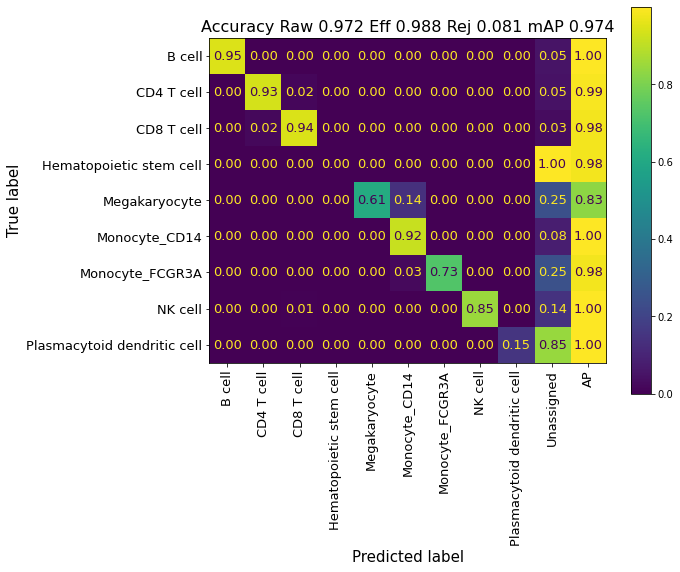

In [11]:
predicted_label2, log2  = obj.evaluate(test_mat, test_labels, frac=0.05, name="testcfmtbr.pdf", test=True, return_log=True)

# JIND+

Epoch 1 Train: 0.0001:   6%|▌         | 11/182 [00:00<00:01, 103.87it/s]

Validation Accuracy 1.0000


Epoch 2 Train: 0.0:   6%|▌         | 11/182 [00:00<00:01, 104.01it/s]

Validation Accuracy 1.0000


Epoch 3 Train: 0.0:   6%|▌         | 11/182 [00:00<00:01, 103.31it/s]

Validation Accuracy 1.0000


Epoch 4 Train: 0.0:   6%|▌         | 11/182 [00:00<00:01, 105.06it/s]

Validation Accuracy 1.0000


Epoch 5 Train: 0.0:   5%|▌         | 10/182 [00:00<00:01, 93.15it/s]

Validation Accuracy 1.0000


Epoch 6 Train: 0.0:   6%|▌         | 11/182 [00:00<00:01, 108.93it/s]

Validation Accuracy 1.0000


Epoch 7 Train: 0.0:   6%|▌         | 11/182 [00:00<00:01, 108.29it/s]

Validation Accuracy 1.0000


Epoch 8 Train: 0.0:   5%|▌         | 10/182 [00:00<00:01, 96.10it/s]

Validation Accuracy 1.0000


Epoch 9 Train: 0.0:   6%|▌         | 11/182 [00:00<00:01, 102.58it/s]

Validation Accuracy 1.0000


Epoch 9 Train: 0.0: 100%|██████████| 182/182 [00:01<00:00, 107.08it/s]


Validation Accuracy 1.0000


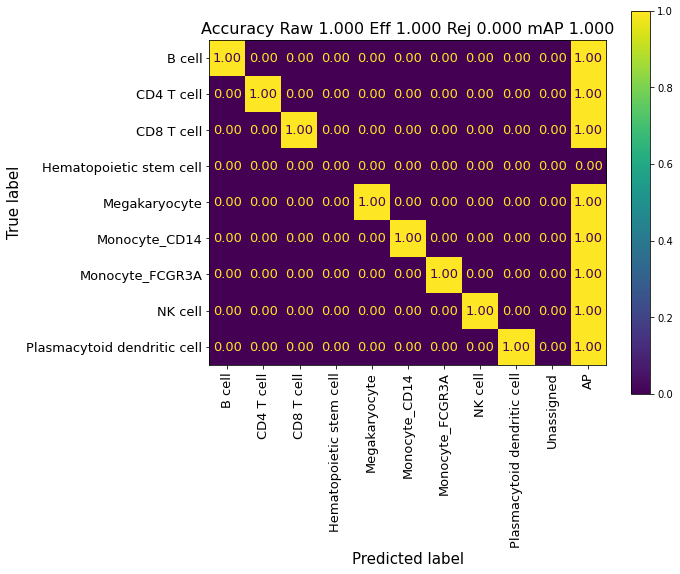

In [12]:
train_config = {'val_frac': 0.1, 'seed': 0, 'batch_size': 32, 'cuda': False,
                'epochs': 10}
obj.ftune(test_mat, train_config) # Creates confusion matrix on the validation data

# Evaluating JIND+

Test Acc Raw 0.9766 Eff 0.9869 Rej 0.0398


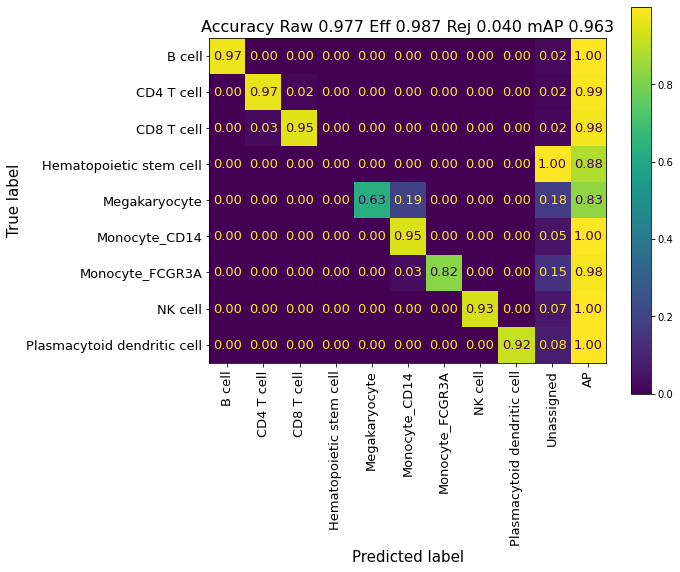

In [13]:
predicted_label3, log3  = obj.evaluate(test_mat, test_labels, frac=0.05, name="testcfmtbrftune.pdf", test=True, return_log=True)

# Visualizing Alignment in Latent Space

In [14]:
# Use the model before self training for comparing the latent state learnt by JIND Adversarial Alignment
obj.set_test_model("BR") # Use BR_ftune for using model saved after pretraining. Note that the encoder is modified in self training.

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 15476 samples in 0.130s...
[t-SNE] Computed neighbors for 15476 samples in 2.428s...
[t-SNE] Computed conditional probabilities for sample 1000 / 15476
[t-SNE] Computed conditional probabilities for sample 2000 / 15476
[t-SNE] Computed conditional probabilities for sample 3000 / 15476
[t-SNE] Computed conditional probabilities for sample 4000 / 15476
[t-SNE] Computed conditional probabilities for sample 5000 / 15476
[t-SNE] Computed conditional probabilities for sample 6000 / 15476
[t-SNE] Computed conditional probabilities for sample 7000 / 15476
[t-SNE] Computed conditional probabilities for sample 8000 / 15476
[t-SNE] Computed conditional probabilities for sample 9000 / 15476
[t-SNE] Computed conditional probabilities for sample 10000 / 15476
[t-SNE] Computed conditional probabilities for sample 11000 / 15476
[t-SNE] Computed conditional probabilities for sample 12000 / 15476
[t-SNE] Computed conditional probabilities for sa

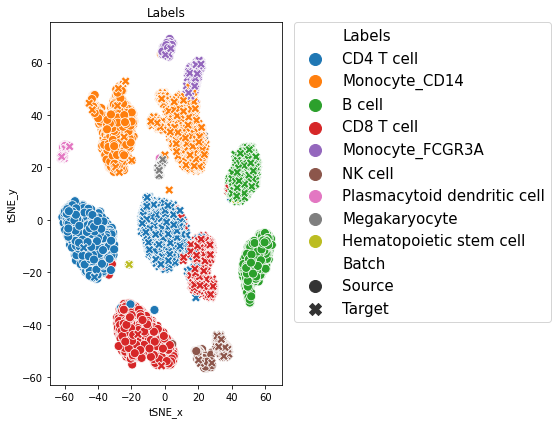

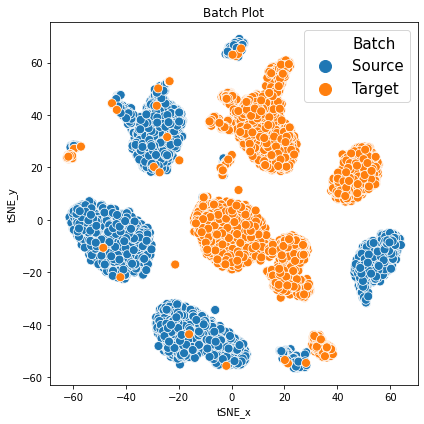

In [15]:
# Latent Space before Alignmnet
obj.vis_latent(train_mat, train_labels, test_mat, test_labels, test=False)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 15476 samples in 0.121s...
[t-SNE] Computed neighbors for 15476 samples in 3.624s...
[t-SNE] Computed conditional probabilities for sample 1000 / 15476
[t-SNE] Computed conditional probabilities for sample 2000 / 15476
[t-SNE] Computed conditional probabilities for sample 3000 / 15476
[t-SNE] Computed conditional probabilities for sample 4000 / 15476
[t-SNE] Computed conditional probabilities for sample 5000 / 15476
[t-SNE] Computed conditional probabilities for sample 6000 / 15476
[t-SNE] Computed conditional probabilities for sample 7000 / 15476
[t-SNE] Computed conditional probabilities for sample 8000 / 15476
[t-SNE] Computed conditional probabilities for sample 9000 / 15476
[t-SNE] Computed conditional probabilities for sample 10000 / 15476
[t-SNE] Computed conditional probabilities for sample 11000 / 15476
[t-SNE] Computed conditional probabilities for sample 12000 / 15476
[t-SNE] Computed conditional probabilities for sa

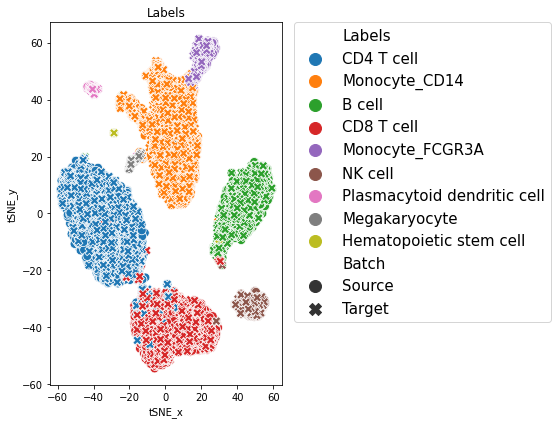

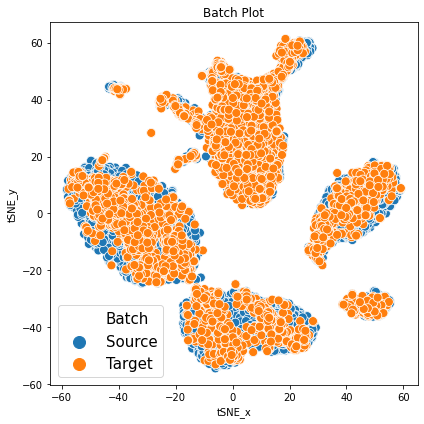

In [16]:
# Latent Space after Alignment
obj.vis_latent(train_mat, train_labels, test_mat, test_labels, test=True)